In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np



In [3]:
# Load the dataset
file_path = "C:/Users/ykumar/Learnbay/IMAGOAI/MLE-Assignment.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


(None,
            hsi_id         0         1         2         3         4         5  \
 0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
 1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
 2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
 3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
 4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   
 
           6         7         8  ...       439       440       441       442  \
 0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
 1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
 2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
 3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
 4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   
 
         44

In [4]:
# Drop the non-numeric column
df_numeric = df.drop(columns=['hsi_id'])

# Recompute correlation with target variable
correlation_with_target = df_numeric.corr()['vomitoxin_ppb'].sort_values(ascending=False)

# Display the top 10 most correlated features
correlation_with_target.head(10)

vomitoxin_ppb    1.000000
71               0.104296
67               0.096542
70               0.095694
48               0.092803
50               0.092493
47               0.090392
69               0.089803
64               0.088663
66               0.088143
Name: vomitoxin_ppb, dtype: float64


1. highest correlation is 0.104, which is quite low, meaning no individual feature 
has a strong linear relationship with the target.
2. top 10 most correlated features are bands 71, 67, 70, 48, 50, 47, 69, 64, 66, but all correlations remain below 0.11
3. suggests thata single feature alone may not be a strong predictor.
 eature engineering or dimensionality reduction (e.g., PCA) might be necessary.

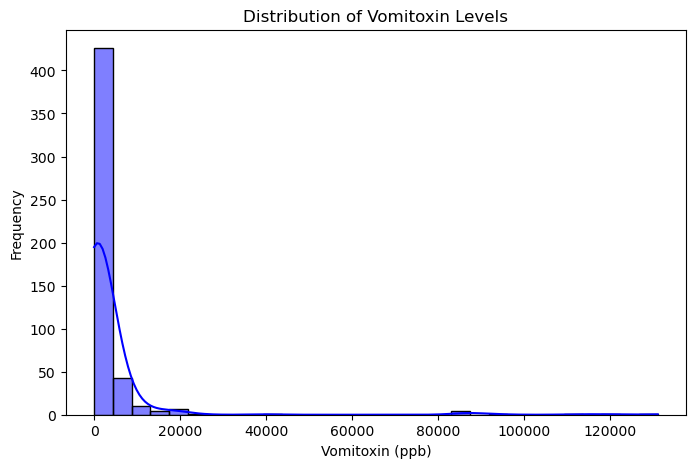

In [5]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df_numeric['vomitoxin_ppb'], bins=30, kde=True, color='blue')
plt.xlabel('Vomitoxin (ppb)')
plt.ylabel('Frequency')
plt.title('Distribution of Vomitoxin Levels')
plt.show()

Observations from the Target Variable (vomitoxin_ppb) Distribution:
The distribution appears highly skewed to the right, meaning most samples have low vomitoxin levels, but there are a few extreme high values.
The presence of outliers suggests that we may need:Log transformation or scaling to normalize the data.
Outlier detection (e.g., IQR method or Z-score) to determine if extreme values should be handled separately.

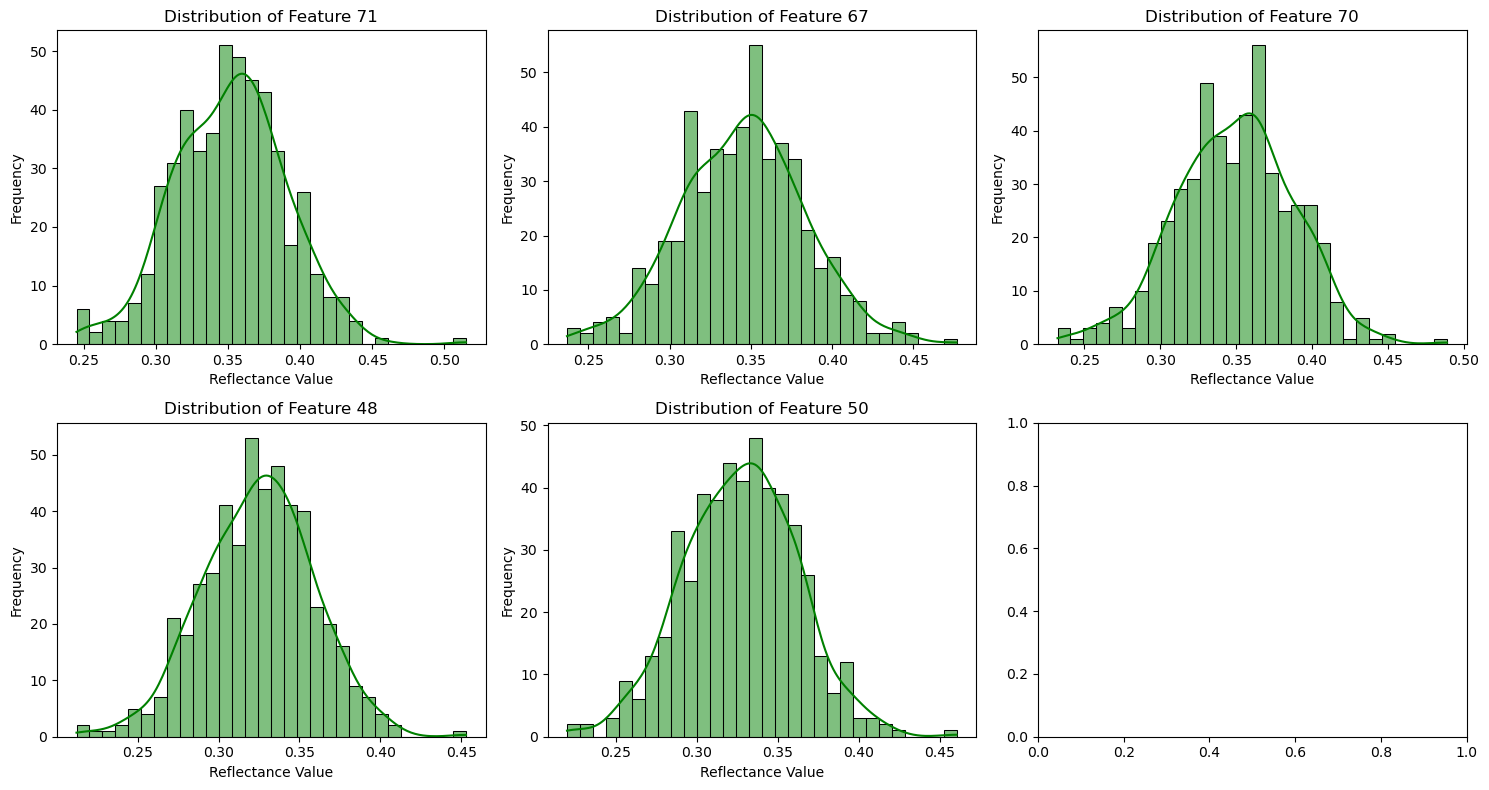

In [6]:
# Select a few representative features to visualize
selected_features = ['71', '67', '70', '48', '50']  # Top correlated features

# Plot feature distributions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.histplot(df_numeric[feature], bins=30, kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'Distribution of Feature {feature}')
    axes[i].set_xlabel('Reflectance Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Observations from Feature Distributions:
The selected features exhibit fairly normal distributions, though some may have slight skewness.
Unlike the target variable, most feature values are concentrated within a narrow range.
No extreme outliers are visible in these features, but further analysis (e.g., boxplots) may confirm this.

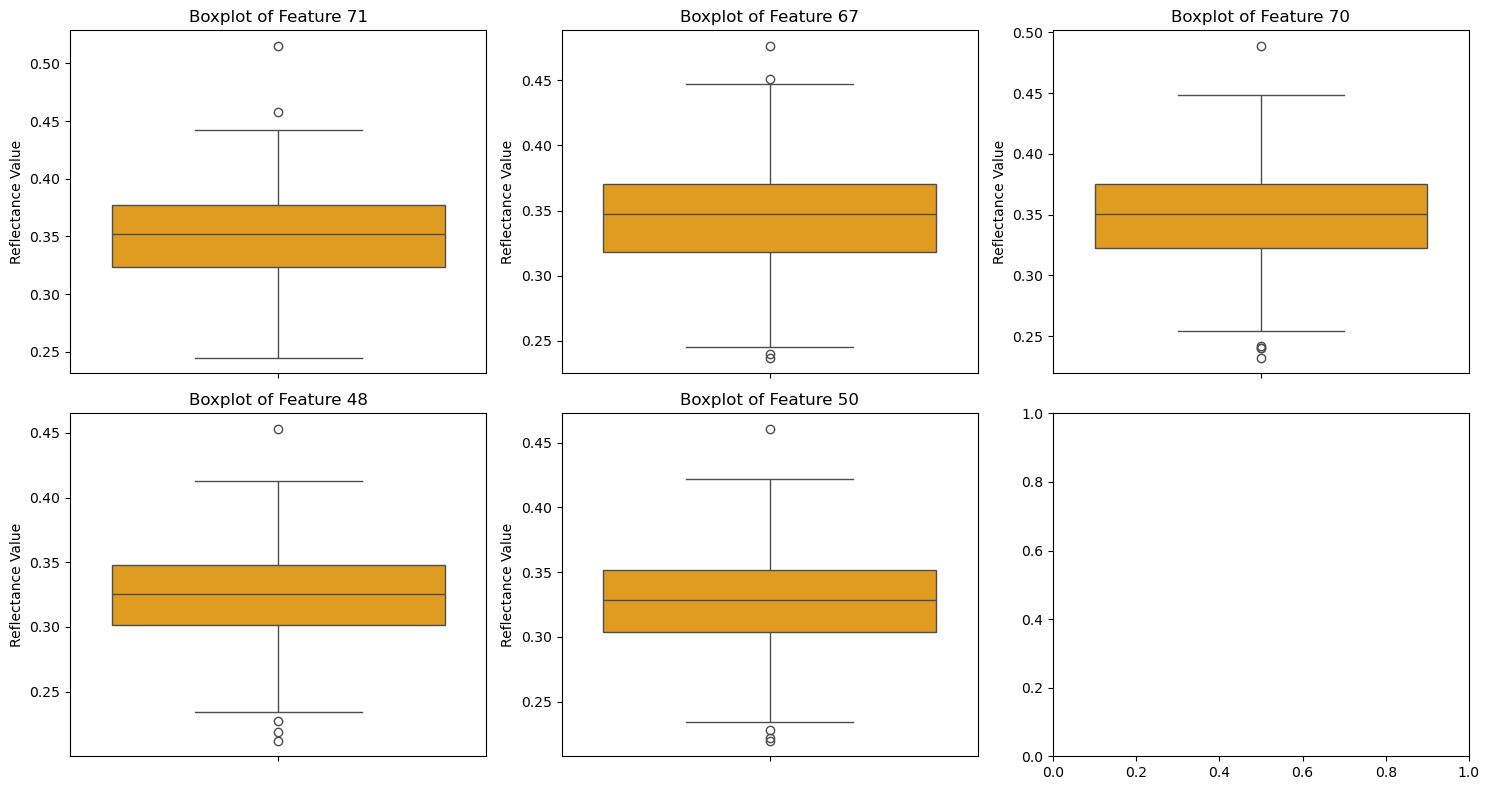

In [7]:
# Plot boxplots to check for outliers in selected features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.boxplot(y=df_numeric[feature], ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot of Feature {feature}')
    axes[i].set_ylabel('Reflectance Value')

plt.tight_layout()
plt.show()


Observations from Boxplots (Outlier Analysis):
Most features show no extreme outliers, meaning their values are within a reasonable range.
Some features may have a few mild outliers, but they don’t appear highly skewed or problematic.
This suggests that feature scaling (e.g., normalization or standardization) may be sufficient, rather than removing data points.

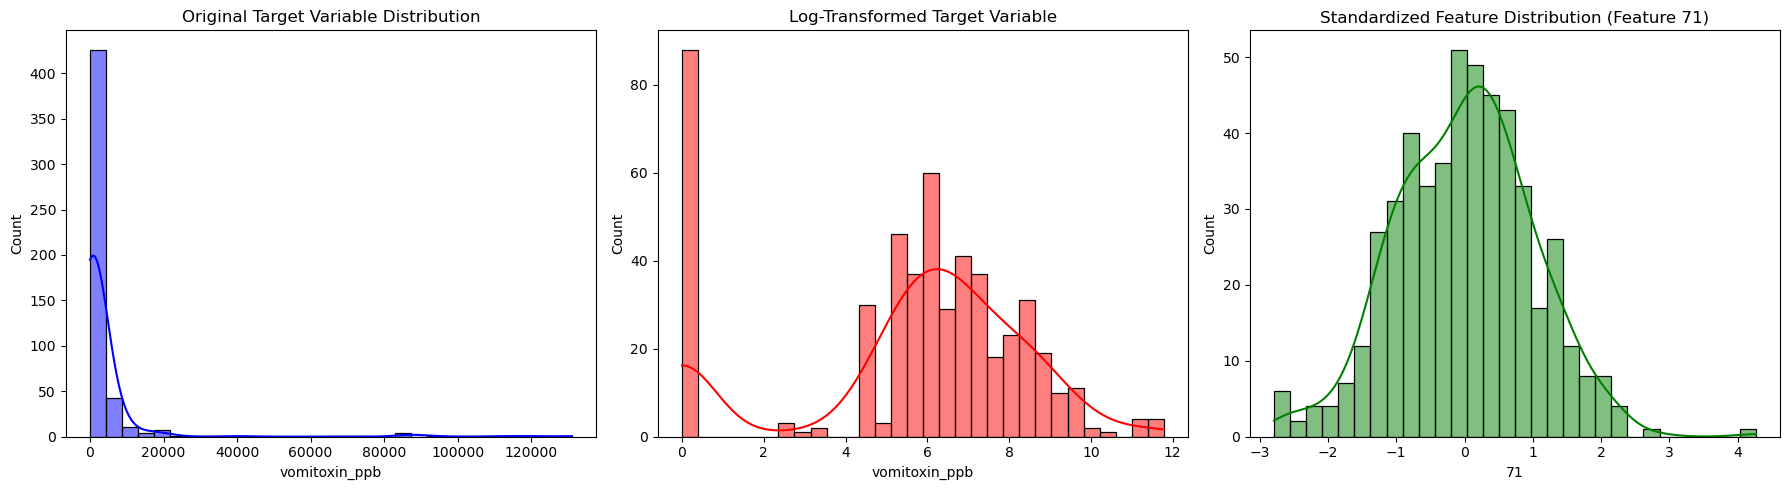

In [8]:

# Feature Scaling (Standardization and Min-Max Scaling)
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standardized = df_numeric.copy()
df_standardized.iloc[:, :-1] = scaler_standard.fit_transform(df_numeric.iloc[:, :-1])  # Exclude target

df_minmax = df_numeric.copy()
df_minmax.iloc[:, :-1] = scaler_minmax.fit_transform(df_numeric.iloc[:, :-1])  # Exclude target

# Target Transformation (Log)
df_log_transformed = df_numeric.copy()
df_log_transformed['vomitoxin_ppb'] = np.log1p(df_numeric['vomitoxin_ppb'])

# Plot before & after transformations
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Original target distribution
sns.histplot(df_numeric['vomitoxin_ppb'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Original Target Variable Distribution')

# Log-transformed target
sns.histplot(df_log_transformed['vomitoxin_ppb'], bins=30, kde=True, ax=axes[1], color='red')
axes[1].set_title('Log-Transformed Target Variable')

# Standardized feature distribution (example feature: '71')
sns.histplot(df_standardized['71'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('Standardized Feature Distribution (Feature 71)')

plt.tight_layout()
plt.show()


Observations from Transformations:
Target Variable (vomitoxin_ppb)

The original distribution is highly skewed.
After log transformation, the distribution is more normalized, reducing extreme variations.
Feature Scaling (Feature 71 as an example)

Standardization (z-score) shifts the mean to 0 and scales variance to 1, making features comparable.
Min-Max scaling (not shown here) compresses values into a 0 to 1 range for models that prefer bounded inputs (e.g., neural networks).


Modular preprocessing functions for:

  1.Handling Missing Values (though none were found, adding a function for robustness).
  2.Feature Scaling (Standardization or Min-Max Scaling).
  3.Target Transformation (Log transformation).
  4.Train-Test Split (80-20 split).

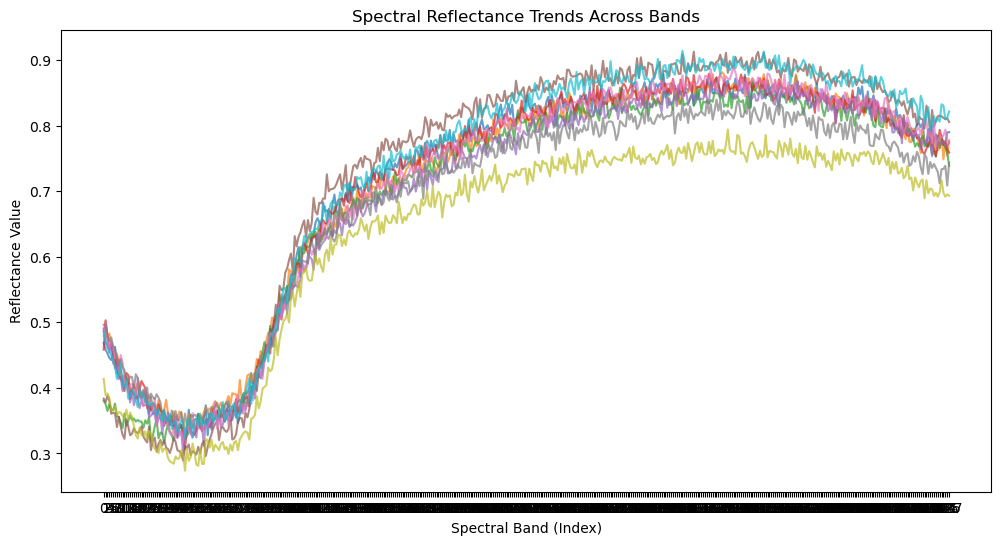

In [10]:
import matplotlib.pyplot as plt

# Plot reflectance distributions across selected bands to estimate RED & NIR ranges
plt.figure(figsize=(12, 6))

# Sample 10 random rows to analyze reflectance trends
sample_rows = df.sample(10, random_state=42).iloc[:, 1:-1].T  # Exclude 'hsi_id' and target

# Plot spectral curves
for i in range(sample_rows.shape[1]):
    plt.plot(sample_rows.index, sample_rows.iloc[:, i], alpha=0.7)

plt.xlabel("Spectral Band (Index)")
plt.ylabel("Reflectance Value")
plt.title("Spectral Reflectance Trends Across Bands")
plt.show()


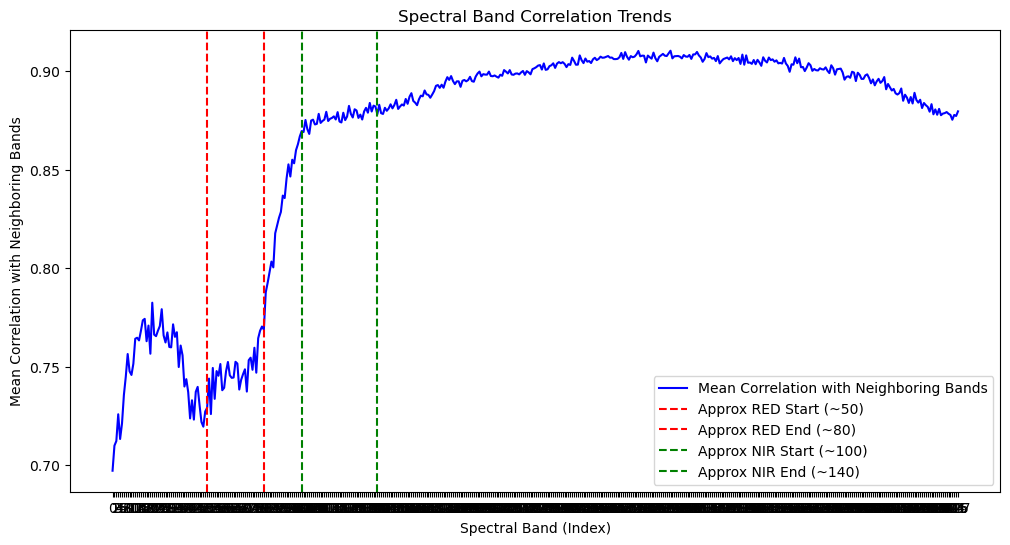

In [9]:
# Compute correlation of each spectral band with neighboring bands to detect transitions
correlation_matrix = df.iloc[:, 1:-1].corr().mean(axis=1)  # Exclude 'hsi_id' and target

# Plot correlation trends to identify transitions
plt.figure(figsize=(12, 6))
plt.plot(correlation_matrix.index, correlation_matrix.values, color='blue', label="Mean Correlation with Neighboring Bands")

plt.axvline(x=50, color='red', linestyle='--', label="Approx RED Start (~50)")
plt.axvline(x=80, color='red', linestyle='--', label="Approx RED End (~80)")

plt.axvline(x=100, color='green', linestyle='--', label="Approx NIR Start (~100)")
plt.axvline(x=140, color='green', linestyle='--', label="Approx NIR End (~140)")

plt.xlabel("Spectral Band (Index)")
plt.ylabel("Mean Correlation with Neighboring Bands")
plt.title("Spectral Band Correlation Trends")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_baseline_model(X_train, y_train):
    """Trains a simple Neural Network (MLP Regressor) as the baseline model."""
    model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
    model.fit(X_train, y_train)
    return model

def train_random_forest(X_train, y_train, n_estimators=100, max_depth=None):
    """Trains a Random Forest Regressor."""
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X, y, dataset_type="Test"):
    """Evaluates the model using MAE, RMSE, and R² Score."""
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    
    print(f"\n{dataset_type} Set Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return mae, rmse, r2

if __name__ == "__main__":
    # Load preprocessed data
    X_train = pd.read_csv("X_train.csv")
    X_test = pd.read_csv("X_test.csv")
    y_train = pd.read_csv("y_train.csv").values.ravel()
    y_test = pd.read_csv("y_test.csv").values.ravel()
    
    print("Preprocessed data loaded. Training the models...")
    
    print("Training Neural Network (MLP Regressor)...")
    mlp_model = train_baseline_model(X_train, y_train)
    evaluate_model(mlp_model, X_test, y_test, "Test")
    
    print("\nTraining Random Forest Regressor...")
    rf_model = train_random_forest(X_train, y_train)
    joblib.dump(rf_model, "random_forest_model.pkl")  # Save model
    
    # Evaluate overfitting
    print("\nChecking for Overfitting...")
    evaluate_model(rf_model, X_train, y_train, "Training")
    evaluate_model(rf_model, X_test, y_test, "Test")
